In [70]:
#### import all the necessary libraries..

import pandas as pd           ### for data pre-processing 
import numpy as np            ### for numerical programming
import matplotlib.pyplot as plt   ## for plots/charts..

In [71]:
### lets read clean_data.csv

df=pd.read_csv("../datasets/clean_data_jorge.csv",index_col=[0])
df.reset_index(drop=True, inplace=True)

In [72]:
### lets print first 2 rows of data..
import pandas as pd
from pandas import option_context

with option_context("display.max_rows", None,"display.max_colwidth",60,"display.max_columns",50):
        display(df.head(2))

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adven...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""na...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched t...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name""...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"":..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fa...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come bac...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Je...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""cr...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"":..."


In [73]:
### lets find all the features-names of dataframe...

df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

### Recommend movies to users Using Weighted average

#### Weighted average rating for each movie is calculated as below:

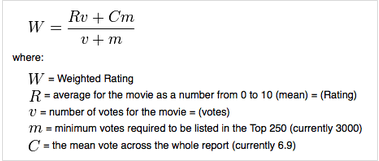

Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page

v = no of votes for movie
m = the minimum votes required to be listed in the chart (Often works as filter)
R = the average rating of the movie
C = mean vote across the whole report

In [74]:
#### Calculate all the components based on the above formula

v=df['vote_count']
C=df['vote_average'].mean()
R=df['vote_average']

In [75]:
df['vote_average']

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64

In [76]:
df['vote_average'].mean()

6.092171559442016

In [77]:
df['vote_count']

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

In [78]:
C

### So, the mean rating for all the movies is approx 6.09 on a scale of 10

6.092171559442016

In [79]:
df['vote_count']

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

In [80]:
df['vote_count'].quantile([0.01,0.05,0.01,0.02,0.05,0.075,0.10,0.25,0.30,0.5,0.65,0.75,0.80,0.85,0.90,0.95,0.975,0.98,0.99,0.995,0.999])

0.010        0.000
0.050        4.000
0.010        0.000
0.020        1.000
0.050        4.000
0.075        8.000
0.100       12.000
0.250       54.000
0.300       76.000
0.500      235.000
0.650      463.300
0.750      737.000
0.800      957.600
0.850     1300.700
0.900     1838.400
0.950     3040.900
0.975     4441.500
0.980     4736.360
0.990     6172.240
0.995     7486.710
0.999    10892.344
Name: vote_count, dtype: float64

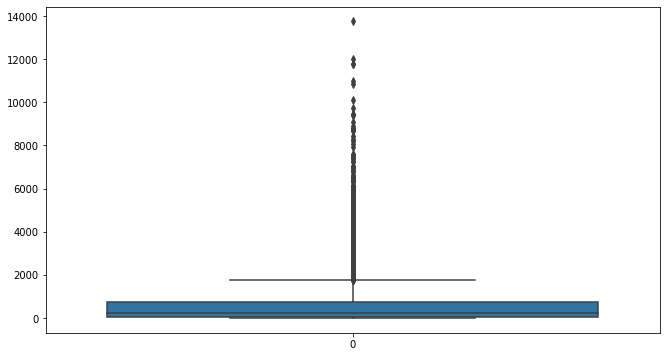

In [81]:
import seaborn as sns
plt.figure(figsize=(11,6))
sns.boxplot(data=df['vote_count'])
plt.show()

In [82]:
#m=1900

In [83]:
#### The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. 
#### We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, 
#### it must have more votes than at least 90% of the movies in the list.

threshold=df['vote_count'].quantile(0.75)

In [84]:
threshold

737.0

In [85]:
df[df['vote_count']>=threshold]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602,350000,"[{""id"": 18, ""name"": ""Drama""}]",389,"[{""id"": 934, ""name"": ""judge""}, {""id"": 1417, ""n...",en,12 Angry Men,The defense and the prosecution have rested an...,59.259204,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",1957-03-25,1000000,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Life is in their hands. Death is on their minds.,8.2,2078,"[{""cast_id"": 29, ""character"": ""Juror 8"", ""cred...","[{""credit_id"": ""52fe423dc3a36847f800ec55"", ""de..."
4639,250000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",431,"[{""id"": 483, ""name"": ""riddle""}, {""id"": 1646, ""...",en,Cube,Seven strangers are taken out of their daily l...,44.656151,"[{""name"": ""T\u00e9l\u00e9film Canada"", ""id"": 8...",1997-09-09,501818,90.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Don't look for a reason... Look for a way out.,6.9,1069,"[{""cast_id"": 5, ""character"": ""Leaven"", ""credit...","[{""credit_id"": ""52fe4243c3a36847f80107bf"", ""de..."
4670,400000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",9659,"[{""id"": 473, ""name"": ""chain""}, {""id"": 1009,

In [86]:
threshold

737.0

In [87]:
data=df[df['vote_count']>=threshold]

In [88]:
data.shape

(1203, 18)

In [89]:
m=threshold

In [90]:
m

737.0

In [91]:
data.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [92]:
data['vote_count'].head(3)

0    11800
1     4500
2     4466
Name: vote_count, dtype: int64

In [93]:
data['vote_average'].head(3)

0    7.2
1    6.9
2    6.3
Name: vote_average, dtype: float64

In [94]:
def weighted_avg_rating(x,m=m,C=C):
    v=x['vote_count']
    R=x['vote_average']
    
    return ((R*v) + (C*m))/(v + m)

In [95]:
#### Define a new feature 'weighted_avg' and calculate value of `avg_weighted_rating'

data['weighted_avg']=data.apply(weighted_avg_rating,axis=1)

C:\Users\jorge.grisman\AppData\Local\Temp\ipykernel_5988\3006501306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weighted_avg']=data.apply(weighted_avg_rating,axis=1)


In [96]:
data.shape

(1203, 19)

In [97]:
data.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.134875
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.786315


In [98]:
df_sorted_ranking=data.sort_values('weighted_avg',ascending=False)

In [99]:

from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth',70,'display.max_columns',50):
              display(df_sorted_ranking.head(3))

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name"": ""Crime""}]",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""name"": ""corruption""},...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of his wife and her love...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you free.,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ""credit_id"": ""52fe42...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""department"": ""Sound"", ...",8.301547
3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name"": ""Crime""}]",238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""name"": ""love at first ...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle of the fictional Ital...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""name"": ""Alfran Product...",1972-03-14,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""it"", ""name...",An offer you can't refuse.,8.4,5893,"[{""cast_id"": 5, ""character"": ""Don Vito Corleone"", ""credit_id"": ""52...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""department"": ""Directin...",8.143459
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",550,"[{""id"": 825, ""name"": ""support group""}, {""id"": 851, ""name"": ""dual i...",en,Fight Club,A ticking-time-bomb insomniac and a slippery soap salesman channel...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {""name"": ""Fox 2000 Pi...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mischief. Mayhem. Soap.,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""credit_id"": ""52fe425...","[{""credit_id"": ""55731b8192514111610027d7"", ""department"": ""Producti...",8.139688


In [100]:
df_sorted_ranking.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [101]:

from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth',70,'display.max_columns',50):
              display(df_sorted_ranking[['original_title','vote_average', 'vote_count','weighted_avg','popularity']].head(15))

,original_title,vote_average,vote_count,weighted_avg,popularity
1881,The Shawshank Redemption,8.5,8205,8.301547,136.747729
3337,The Godfather,8.4,5893,8.143459,143.659698
662,Fight Club,8.3,9413,8.139688,146.757391
3232,Pulp Fiction,8.3,8428,8.122458,121.463076
65,The Dark Knight,8.2,12002,8.078054,187.322927
809,Forrest Gump,8.2,7927,8.020698,138.133331
96,Inception,8.1,13752,7.997869,167.583710
1818,Schindler's List,8.3,4329,7.978806,104.469351
3865,Whiplash,8.3,4254,7.973979,192.528841
95,Interstellar,8.1,10867,7.972478,724.247784


#### Finding most recommended movies on the basis of Weighted avg

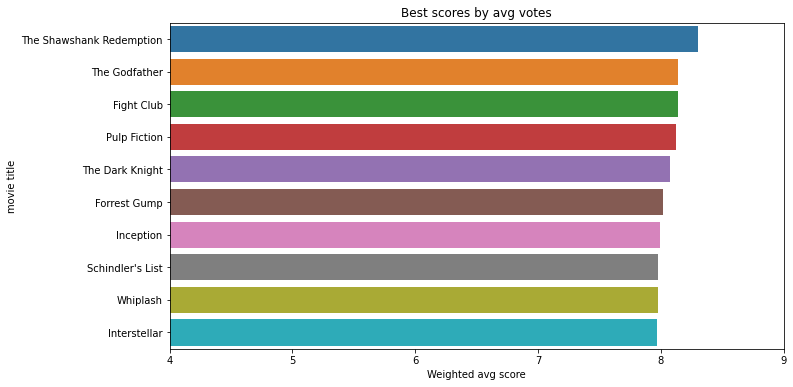

In [102]:
plt.figure(figsize=(11,6))

sns.barplot(x=df_sorted_ranking['weighted_avg'].head(10),y=df_sorted_ranking['original_title'].head(10),
            data=df_sorted_ranking)
plt.xlim(4,9)
plt.title('Best scores by avg votes')
plt.xlabel('Weighted avg score')
plt.ylabel('movie title')
plt.show()

#### Recommend movies to users considering its popularity

In [103]:
from pandas import option_context

with option_context("display.max_rows", None,"display.max_colwidth", 20,"display.max_columns",100):
              display(data.head(5))

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg
0,237000000,"[{""id"": 28, ""nam...",19995,"[{""id"": 1463, ""n...",en,Avatar,In the 22nd cent...,150.437577,"[{""name"": ""Ingen...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""...",Enter the World ...,7.2,11800,"[{""cast_id"": 242...","[{""credit_id"": ""...",7.134875
1,300000000,"[{""id"": 12, ""nam...",285,"[{""id"": 270, ""na...",en,Pirates of the C...,Captain Barbossa...,139.082615,"[{""name"": ""Walt ...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""...",At the end of th...,6.9,4500,"[{""cast_id"": 4, ...","[{""credit_id"": ""...",6.786315
2,245000000,"[{""id"": 28, ""nam...",206647,"[{""id"": 470, ""na...",en,Spectre,A cryptic messag...,107.376788,"[{""name"": ""Colum...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""...",A Plan No One Es...,6.3,4466,"[{""cast_id"": 1, ...","[{""credit_id"": ""...",6.270561
3,250000000,"[{""id"": 28, ""nam...",49026,"[{""id"": 849, ""na...",en,The Dark Knight ...,Following the de...,112.312950,"[{""name"": ""Legen...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""...",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ...","[{""credit_id"": ""...",7.487101
4,260000000,"[{""id"": 28, ""nam...",49529,"[{""id"": 818, ""na...",en,John Carter,John Carter is a...,43.926995,"[{""name"": ""Walt ...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""...",Lost in our worl...,6.1,2124,"[{""cast_id"": 5, ...","[{""credit_id"": ""...",6.097983


In [104]:
data.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [105]:
### Under the Trending Now tab of these systems we find movies that are very popular and they can just be obtained by 
### sorting the dataset by the popularity column.

popularity=data.sort_values('popularity',ascending=False)

In [106]:
from pandas import option_context

with option_context("display.max_rows", None,"display.max_colwidth", 200,"display.max_columns",100):
              display(popularity.head(5))

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""name"": ""Comedy""}]",211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}, {""id"": 179431, ""name"": ""duringcreditsstinger""}, {""id"": 189481, ""name"": ""evil mastermind""}, {""id"": 190999, ""name"":...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by Scarlet Overkill, a super-villain who, alongside her inventor husband Herb, hatches a plot to take over the world.",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""name"": ""Illumination Entertainment"", ""id"": 6704}]",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkill (voice)"", ""credit_id"": ""54cd4a5d9251414755001dae"", ""gender"": 1, ""id"": 18277, ""name"": ""Sandra Bullock"", ""order"": 0}, {""cast_id"": 24, ""character"": ""He...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""department"": ""Production"", ""gender"": 2, ""id"": 5720, ""job"": ""Producer"", ""name"": ""Christopher Meledandri""}, {""credit_id"": ""53ccb8edc3a368776a002323"", ""dep...",6.357259
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""name"": ""Science Fiction""}]",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id"": 310, ""name"": ""artificial intelligence""}, {""id"": 494, ""name"": ""father son relationship""}, {""id"": 641, ""name"": ""single parent""}, {""id"": 1432, ""name"": ...",en,Interstellar,Interstellar chronicles the adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space travel and conquer the vast distances involved ...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""name"": ""Legendary Pictures"", ""id"": 923}, {""name"": ""Warner Bros."", ""id"": 6194}, {""name"": ""Syncopy"", ""id"": 9996}, {""name"": ""Lynda Obst Productions"", ""id"":...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant to die here.,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ""credit_id"": ""52fe4bbf9251416c910e47cb"", ""gender"": 2, ""id"": 10297, ""name"": ""Matthew McConaughey"", ""order"": 0}, {""cast_id"": 17, ""character"": ""Murph Coo...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""department"": ""Sound"", ""gender"": 2, ""id"": 947, ""job"": ""Original Music Composer"", ""name"": ""Hans Zimmer""}, {""credit_id"": ""52fe4bbf9251416c910e47c1"", ""depar...",7.972478
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""name"": ""Comedy""}]",293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 3070, ""name"": ""mercenary""}, {""id"": 8828, ""name"": ""marvel comic""}, {""id"": 9715, ""name"": ""superhero""}, {""id"": 9717, ""name"": ""based on comic book""}, {""id"": ...",en,Deadpool,"Deadpool tells the origin story of former Special Forces operative turned mercenary Wade Wilson, who after being subjected to a rogue experiment that leaves him with accelerated healing powers, ad...",514.569956,"[{""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Marvel Entertainment"", ""id"": 7505}, {""name"": ""The Donners' Company"", ""id"": 11307}, {""name"": ""TSG Entertainment"", ""id"": 222...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Witness the beginning of a happy ending,7.4,10995,"[{""cast_id"": 99, ""character"": ""Wade Wilson / Deadpool"", ""credit_id"": ""57169b95925141695b00046f"", ""g

In [107]:
popularity.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [108]:
pop=popularity[['original_title','popularity','vote_average', 'vote_count']]

In [109]:
from pandas import option_context

with option_context("display.max_rows", None,"display.max_colwidth", 200,"display.max_columns",100):
              display(pop)

,original_title,popularity,vote_average,vote_count
546,Minions,875.581305,6.4,4571
95,Interstellar,724.247784,8.1,10867
788,Deadpool,514.569956,7.4,10995
94,Guardians of the Galaxy,481.098624,7.9,9742
127,Mad Max: Fury Road,434.278564,7.2,9427
28,Jurassic World,418.708552,6.5,8662
199,Pirates of the Caribbean: The Curse of the Black Pearl,271.972889,7.5,6985
82,Dawn of the Planet of the Apes,243.791743,7.3,4410
200,The Hunger Games: Mockingjay - Part 1,206.227151,6.6,5584
88,Big Hero 6,203.734590,7.8,6135


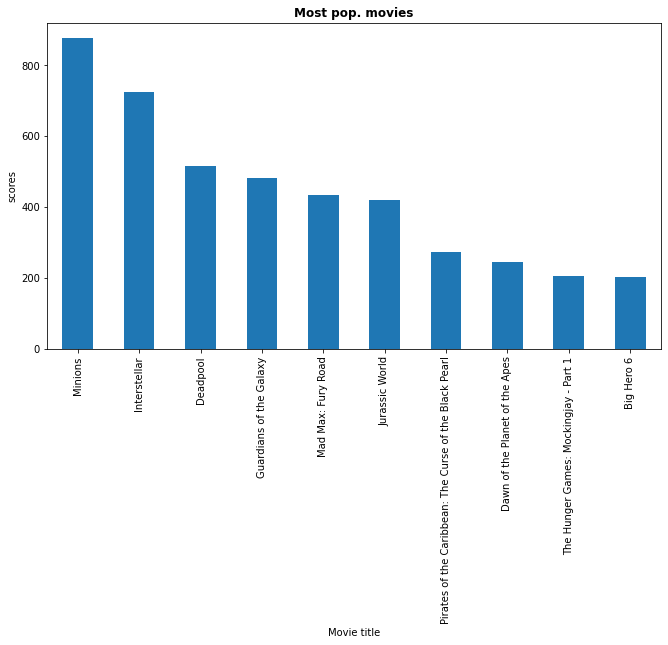

In [68]:
plt.figure(figsize=(11,6))

pop.set_index('original_title')['popularity'].nlargest(10).plot(kind='bar')
plt.title('Most pop. movies',weight='bold')
plt.xlabel('Movie title')
plt.ylabel('scores')
plt.show()

## Build Recommendation system based on scaled weighted average and normalized_popularity score(Priority is given 50% to both)

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scaling=MinMaxScaler()

In [112]:
popularity.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [113]:
popularity[['weighted_avg','popularity']]

,weighted_avg,popularity
546,6.357259,875.581305
95,7.972478,724.247784
788,7.317843,514.569956
94,7.772853,481.098624
127,7.119670,434.278564
...,...,...
508,6.175351,2.502487
2511,6.864275,2.186927
799,5.902538,2.143764
334,5.802712,1.859364


In [114]:
## storing your df_normalized into df_scaled..

df_scaled=scaling.fit_transform(popularity[['weighted_avg','popularity']])

In [115]:
df_scaled

array([[4.42562832e-01, 1.00000000e+00],
       [9.05654232e-01, 8.26855423e-01],
       [7.17967071e-01, 5.86957624e-01],
       ...,
       [3.12192117e-01, 6.77627919e-04],
       [2.83571294e-01, 3.52238559e-04],
       [3.68114715e-01, 0.00000000e+00]])

In [116]:
popularity[['weighted_avg_scaled','popularity_scaled']]=df_scaled

In [117]:
popularity.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled'],
      dtype='object')

In [118]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth', 50,'display.max_columns',100):
              display(popularity.head(5))

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg,weighted_avg_scaled,popularity_scaled
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",6.357259,0.442563,1.000000
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.972478,0.905654,0.826855
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Witness the beginning of a happy ending,7.4,10995,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",7.317843,0.717967,0.586958
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",All heroes start somewhere.,7.9,9742,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",7.772853,0.848421,0.548662
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",What a Lovely Day.,7.2,9427,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",7.119670,0.661150,0.495094


In [119]:
popularity.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled'],
      dtype='object')

In [120]:
### score_mix must have share of 50 percent of weighted_avg_scaled & 50 % of popularity_scaled..

popularity['score_mix']=popularity['weighted_avg_scaled'] * 0.5 + popularity['popularity_scaled'] * 0.5

In [121]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth', 50,'display.max_columns',100):
              display(popularity.head(5))

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg,weighted_avg_scaled,popularity_scaled,score_mix
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",6.357259,0.442563,1.000000,0.721281
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.972478,0.905654,0.826855,0.866255
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Witness the beginning of a happy ending,7.4,10995,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",7.317843,0.717967,0.586958,0.652462
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",All heroes start somewhere.,7.9,9742,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",7.772853,0.848421,0.548662,0.698542
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",What a Lovely Day.,7.2,9427,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",7.119670,0.661150,0.495094,0.578122


In [122]:
popularity.shape

(1203, 22)

In [125]:
popularity_sort=popularity.sort_values(['score_mix'],ascending=False)

In [126]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth', 50,'display.max_columns',100):
              display(popularity_sort.head(5))

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg,weighted_avg_scaled,popularity_scaled,score_mix
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.972478,0.905654,0.826855,0.866255
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",6.357259,0.442563,1.000000,0.721281
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",All heroes start somewhere.,7.9,9742,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",7.772853,0.848421,0.548662,0.698542
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Witness the beginning of a happy ending,7.4,10995,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",7.317843,0.717967,0.586958,0.652462
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",What a Lovely Day.,7.2,9427,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",7.119670,0.661150,0.495094,0.578122


In [127]:
popularity_sort[0:10]['score_mix']

95      0.866255
546     0.721281
94      0.698542
788     0.652462
127     0.578122
1881    0.577341
65      0.574235
3865    0.562293
662     0.559864
3337    0.558632
Name: score_mix, dtype: float64

In [128]:
popularity_sort.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled', 'score_mix'],
      dtype='object')

In [ ]:
### Visualise Data using plotly

In [130]:
import plotly.express as px

In [149]:
fig = px.bar(x=popularity_sort[0:10]['original_title'],y=popularity_sort[0:10]['score_mix'],
       height=600, text_auto=True,template= "plotly_white",title="movies score_mix")

fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide', 
                  title_font=dict(size=20))
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
title_font_family="Arial"
fig.show()